<a href="https://colab.research.google.com/github/vkdl/python/blob/main/test_dataset%EC%9C%BC%EB%A1%9C_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


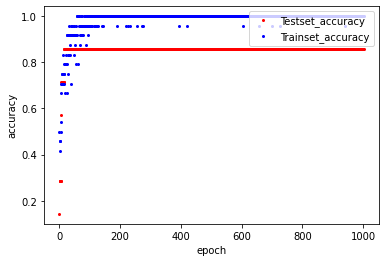

10/10 [==============================] - 0s 2ms/step - loss: 1.5401 - accuracy: 0.8119

 Accuracy: 0.8119


In [ ]:
# 사용할 모듈
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

# random seed 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 프레임
url1 = "https://raw.github.com/vkdl/gitpro/main-branch/heart%20disease%20classification%20dataset.csv"
df = pd.read_csv(url1)

# 예측값 one-hot encoding
y = df.iloc[:,14]
y = pd.get_dummies(y)
y1 = y.drop('no', axis=1)

# 성별값 one-hot encoding
z = df.iloc[:,2]
z = pd.get_dummies(z)

# 결측값 변수별 평균으로 대체
df = df.fillna(df.mean())

# 자료의 Standardization
normalization_df = (df - df.mean())/df.std()
x = normalization_df.iloc[:,1:13]

# 성별값과 x의 데이터 프레임의 결합
x1 = pd.concat([x, z], axis = 1)

# 학습셋과 테스트셋 구분
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.1, shuffle=True)

# 모델 설정
model = Sequential()
model.add(Dense(24,  input_dim=14, activation='relu'))
model.add(Dense(10, activation='relu'))

# Dropout 사용
model.add(Dropout(0.25)) #Dropout 사용
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 사용
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=20)

# 조건을 만족하는 모델 저장
model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = "./model/{epoch:02d}-{val_accuracy:4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_accuracy', verbose = 0, save_best_only = True)

# 모델 실행
history = model.fit(x_test, y_test, epochs=1003, batch_size=8, validation_split=0.2, verbose=0, callbacks=[checkpointer])

# 그래프
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, "o", c="red", markersize=2, label='Testset_accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Trainset_accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(x1, y1)[1]))